In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.patheffects as path_effects

## Read dataset

In [2]:
df = pd.read_pickle("aggregate_jams.pkl")

## Mengkategorikan mana yang weekdays dan weekend

In [3]:
test = df
test['year'] = test.apply(lambda row: row.time[:4],axis=1)
test['month'] = test.apply(lambda row: row.time[5:7],axis=1)
test['day']= test.apply(lambda row: row.time[8:10],axis=1)
test['hour'] = test.apply(lambda row: row.time[11:13],axis=1)
test = test[test['year']=='2019']
test[['year','month','day']] = test[['year','month','day']].astype(str).astype(int) 
test['day'] = test.apply(lambda row: datetime.date(row.year,row.month,row.day).weekday(),axis=1)
test['day'] = test['day'].replace([0, 1, 2, 3,4], 'Weekday')
test['day'] = test['day'].replace([5,6], 'Weekend')
test

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-3-278dac1e75d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['day'] = test.apply(lambda row: datetime.date(row.year,row.month,row.day).weekday(),axis=1)
<ipython-input-3-278dac1e75d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,time,street,level,geometry,avg_speed_kmh,avg_delay,year,month,day,hour
0,2019-11-13 18:00:00,Padasuka,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",10.710000,148.23810,2019,11,Weekday,18
1,2019-11-13 18:00:00,Pagarsih,2,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",13.590000,113.42857,2019,11,Weekday,18
2,2019-11-13 18:00:00,Pagarsih,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",12.939730,150.35135,2019,11,Weekday,18
3,2019-11-13 18:00:00,Pahlawan,2,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",9.678572,117.85714,2019,11,Weekday,18
4,2019-11-13 18:00:00,Pahlawan,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",7.296818,101.27273,2019,11,Weekday,18
...,...,...,...,...,...,...,...,...,...,...
2916632,2019-11-13 18:00:00,Otto Iskandardinata,2,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",19.229311,86.13793,2019,11,Weekday,18
2916633,2019-11-13 18:00:00,Otto Iskandardinata,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",13.367272,150.86363,2019,11,Weekday,18
2916634,2019-11-13 18:00:00,Otto Iskandardinata,4,"{""type"": ""LineString"", ""coordinates"": [[107.60...",6.770000,158.00000,2019,11,Weekday,18
2916635,2019-11-13 18:00:00,Padasuka,1,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",12.673333,70.00000,2019,11,Weekday,18


In [4]:
#test['time'] = test['time'].apply(pd.to_datetime)

## Rerata Weekdays Per Jalan per Jam (Top 5)

In [5]:
test_day = test[test['day']=='Weekday']
street = test_day.groupby(['street'])['level'].agg('sum').to_frame().reset_index().sort_values(by='level',ascending=False)
street_name = street[:9]['street'].unique()
test_day['count'] = 1
street_hour = test_day.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
street_hour['rerata'] = street_hour['level']/street_hour['count']
street_hour_nine = street_hour[street_hour['street'].isin(street_name)]
street_hour_nine['hour'] = street_hour_nine['hour'].astype(str).astype(int)
street_hour_nine = street_hour_nine[(street_hour_nine['hour']>5) & (street_hour_nine['hour']<21)]

<ipython-input-5-3ee62993c60d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_day['count'] = 1
<ipython-input-5-3ee62993c60d>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  street_hour = test_day.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
<ipython-input-5-3ee62993c60d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_hour_nine['hour'] = street_hou

## Df for Viz

In [6]:
soetta = street_hour_nine[street_hour_nine['street']=='N3 Soekarno-Hatta'].sort_values(by='hour')
ayani = street_hour_nine[street_hour_nine['street']=='Jenderal Ahmad Yani'].sort_values(by='hour')
iadjie = street_hour_nine[street_hour_nine['street']=='Jenderal Ibrahim Adjie'].sort_values(by='hour')
ahnasu = street_hour_nine[street_hour_nine['street']=='Jenderal AH Nasution'].sort_values(by='hour')
gatsu = street_hour_nine[street_hour_nine['street']=='Gatot Subroto'].sort_values(by='hour')
dago = street_hour_nine[street_hour_nine['street']=='Ir Haji Juanda'].sort_values(by='hour')
peta = street_hour_nine[street_hour_nine['street']=='Peta'].sort_values(by='hour')
bubat = street_hour_nine[street_hour_nine['street']=='Terusan Buah Batu'].sort_values(by='hour')

## Create Interpolasi per street

In [7]:
j11 = soetta['hour'].to_numpy()
j12 = soetta['rerata'].to_numpy()
j21 = ayani['hour'].to_numpy()
j22= ayani['rerata'].to_numpy()
j31= iadjie['hour'].to_numpy()
j32= iadjie['rerata'].to_numpy()
j41= ahnasu['hour'].to_numpy()
j42= ahnasu['rerata'].to_numpy()
j51= gatsu['hour'].to_numpy()
j52= gatsu['rerata'].to_numpy()
j61= dago['hour'].to_numpy()
j62= dago['rerata'].to_numpy()
j71= peta['hour'].to_numpy()
j72= peta['rerata'].to_numpy()
j81= bubat['hour'].to_numpy()
j82= bubat['rerata'].to_numpy()


X_Y_1 = make_interp_spline(j11, j12)
X_Y_2 = make_interp_spline(j21, j22)
X_Y_3 = make_interp_spline(j31, j32)
X_Y_4 = make_interp_spline(j41, j42)
X_Y_5 = make_interp_spline(j51, j52)
X_Y_6 = make_interp_spline(j61, j62)
X_Y_7 = make_interp_spline(j71, j72)
X_Y_8 = make_interp_spline(j81, j82)

X_1 = np.linspace(j11.min(), j11.max(), 500)
Y_1 = X_Y_1(X_1)
X_2 = np.linspace(j21.min(), j21.max(), 500)
Y_2 = X_Y_2(X_2)
X_3 = np.linspace(j31.min(), j31.max(), 500)
Y_3 = X_Y_3(X_3)
X_4 = np.linspace(j41.min(), j41.max(), 500)
Y_4 = X_Y_4(X_4)
X_5 = np.linspace(j51.min(), j51.max(), 500)
Y_5 = X_Y_5(X_5)
X_6 = np.linspace(j61.min(), j61.max(), 500)
Y_6 = X_Y_6(X_6)
X_7 = np.linspace(j71.min(), j71.max(), 500)
Y_7 = X_Y_7(X_7)
X_8 = np.linspace(j81.min(), j81.max(), 500)
Y_8 = X_Y_8(X_8)

Text(0.9, 0.06, 'Sumber Data: Waze\nTahun: 2019')

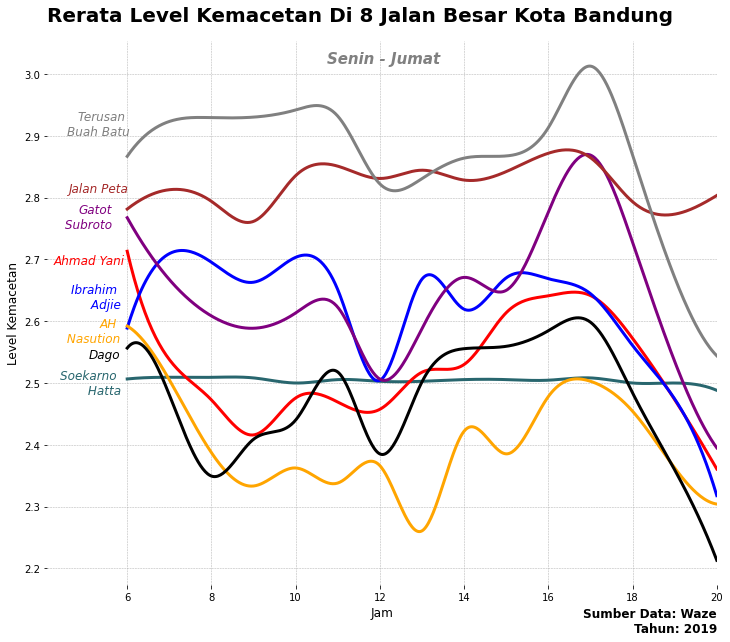

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(X_1,Y_1,color='#28666E' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_2,Y_2,color='red' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_3,Y_3,color='blue' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_4,Y_4,color='orange' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_5,Y_5,color='purple' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_6,Y_6,color='black' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_7,Y_7,color='brown' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_8,Y_8,color='grey' ,label = 'Recovery Rate',linewidth=3)
plt.title('Rerata Level Kemacetan Di 8 Jalan Besar Kota Bandung',fontweight='bold',fontsize=20,pad=20,loc='left')

fig.text(0.58, 0.85, "Senin - Jumat",
         fontsize=15, ha='right',color='grey',fontweight='bold',fontstyle='italic')

fig.text(0.22,0.75,"Terusan \nBuah Batu",fontsize=12,color='grey',ha='right',fontstyle='italic')
fig.text(0.22,0.67,"Jalan Peta",fontsize=12,color='brown',ha='right',fontstyle='italic')
fig.text(0.2,0.62,"Gatot\n Subroto",fontsize=12,color='purple',ha='right',fontstyle='italic')
fig.text(0.215,0.57,"Ahmad Yani",fontsize=12,color='red',ha='right',fontstyle='italic')
fig.text(0.21,0.51,"Ibrahim \n Adjie",fontsize=12,color='blue',ha='right',fontstyle='italic')
fig.text(0.21,0.462,"AH \n Nasution",fontsize=12,color='orange',ha='right',fontstyle='italic')
fig.text(0.21,0.44,"Dago",fontsize=12,color='black',ha='right',fontstyle='italic')
fig.text(0.21,0.39,"Soekarno \n Hatta",fontsize=12,color='#28666E',ha='right',fontstyle='italic')


ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlim(4.1,20)
ax.set_xlabel("Jam", fontsize=12,color='black')
ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

fig.text(0.9,0.06,"Sumber Data: Waze\nTahun: 2019",fontsize=12,color='black',ha='right',fontweight='bold')



#ax.axis('off')
#ax.set_xticklabels(['6','8'])

In [9]:
test['count'] = 1

<ipython-input-9-32b0ae945811>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['count'] = 1


## Weekend

In [10]:
test_day_weekend = test[test['day']=='Weekend']
street = test_day_weekend.groupby(['street'])['level'].agg('sum').to_frame().reset_index().sort_values(by='level',ascending=False)
street_name_weekend = street[:8]['street'].unique()
street_hour_weekend = test_day_weekend.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
street_hour_weekend['rerata'] = street_hour_weekend['level']/street_hour_weekend['count']
street_hour_nine_weekend = street_hour_weekend[street_hour_weekend['street'].isin(street_name_weekend)]
street_hour_nine_weekend

<ipython-input-10-831c5b7459bc>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  street_hour_weekend = test_day_weekend.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)


,street,hour,level,count,rerata
16534,N3 Soekarno-Hatta,10,560,224,2.500000
16544,N3 Soekarno-Hatta,20,560,224,2.500000
16543,N3 Soekarno-Hatta,19,560,224,2.500000
16542,N3 Soekarno-Hatta,18,560,224,2.500000
7738,Ir Haji Juanda,18,561,223,2.515695
...,...,...,...,...,...
11382,Jenderal Ahmad Yani,02,24,9,2.666667
18818,Peta,01,22,8,2.750000
18820,Peta,03,15,5,3.000000
18821,Peta,04,15,5,3.000000


In [11]:
street_hour_nine_weekend['hour'] = street_hour_nine_weekend['hour'].astype(str).astype(int)
street_hour_nine_weekend = street_hour_nine_weekend[(street_hour_nine_weekend['hour']>5) & (street_hour_nine_weekend['hour']<21)]

<ipython-input-11-af5496ab6adc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_hour_nine_weekend['hour'] = street_hour_nine_weekend['hour'].astype(str).astype(int)


In [12]:
soetta = street_hour_nine_weekend[street_hour_nine_weekend['street']=='N3 Soekarno-Hatta'].sort_values(by='hour')
ayani = street_hour_nine_weekend[street_hour_nine_weekend['street']=='Jenderal Ahmad Yani'].sort_values(by='hour')
iadjie = street_hour_nine_weekend[street_hour_nine_weekend['street']=='Jenderal Ibrahim Adjie'].sort_values(by='hour')
ahnasu = street_hour_nine_weekend[street_hour_nine_weekend['street']=='Jenderal AH Nasution'].sort_values(by='hour')
gatsu = street_hour_nine_weekend[street_hour_nine_weekend['street']=='Gatot Subroto'].sort_values(by='hour')
dago = street_hour_nine_weekend[street_hour_nine_weekend['street']=='Ir Haji Juanda'].sort_values(by='hour')
peta = street_hour_nine_weekend[street_hour_nine_weekend['street']=='Peta'].sort_values(by='hour')
dipo = street_hour_nine_weekend[street_hour_nine_weekend['street']=='Diponegoro'].sort_values(by='hour')

In [13]:
j11 = soetta['hour'].to_numpy()
j12 = soetta['rerata'].to_numpy()
j21 = ayani['hour'].to_numpy()
j22= ayani['rerata'].to_numpy()
j31= iadjie['hour'].to_numpy()
j32= iadjie['rerata'].to_numpy()
j41= ahnasu['hour'].to_numpy()
j42= ahnasu['rerata'].to_numpy()
j51= gatsu['hour'].to_numpy()
j52= gatsu['rerata'].to_numpy()
j61= dago['hour'].to_numpy()
j62= dago['rerata'].to_numpy()
j71= peta['hour'].to_numpy()
j72= peta['rerata'].to_numpy()
j81= dipo['hour'].to_numpy()
j82= dipo['rerata'].to_numpy()


X_Y_1 = make_interp_spline(j11, j12)
X_Y_2 = make_interp_spline(j21, j22)
X_Y_3 = make_interp_spline(j31, j32)
X_Y_4 = make_interp_spline(j41, j42)
X_Y_5 = make_interp_spline(j51, j52)
X_Y_6 = make_interp_spline(j61, j62)
X_Y_7 = make_interp_spline(j71, j72)
X_Y_8 = make_interp_spline(j81, j82)

X_1 = np.linspace(j11.min(), j11.max(), 500)
Y_1 = X_Y_1(X_1)
X_2 = np.linspace(j21.min(), j21.max(), 500)
Y_2 = X_Y_2(X_2)
X_3 = np.linspace(j31.min(), j31.max(), 500)
Y_3 = X_Y_3(X_3)
X_4 = np.linspace(j41.min(), j41.max(), 500)
Y_4 = X_Y_4(X_4)
X_5 = np.linspace(j51.min(), j51.max(), 500)
Y_5 = X_Y_5(X_5)
X_6 = np.linspace(j61.min(), j61.max(), 500)
Y_6 = X_Y_6(X_6)
X_7 = np.linspace(j71.min(), j71.max(), 500)
Y_7 = X_Y_7(X_7)
X_8 = np.linspace(j81.min(), j81.max(), 500)
Y_8 = X_Y_8(X_8)

Text(0.9, 0.06, 'Sumber Data: Waze\nTahun: 2019')

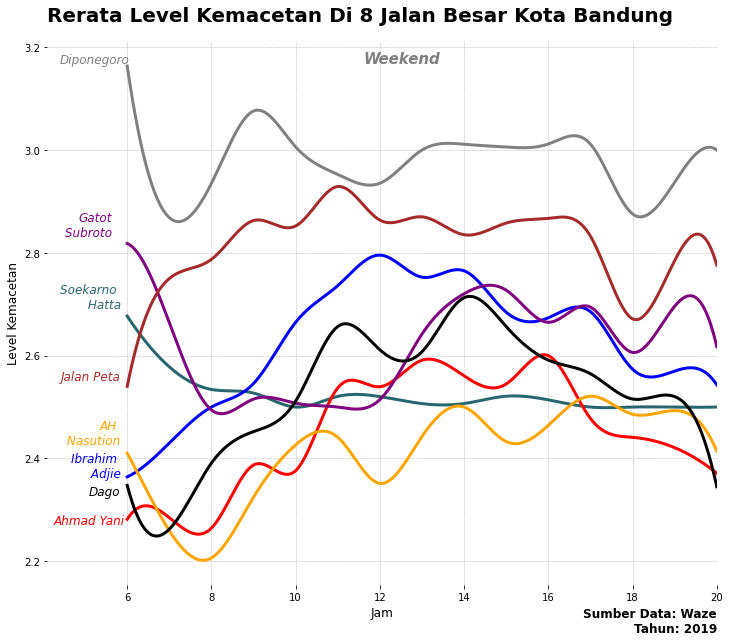

In [14]:
fig, ax = plt.subplots(figsize=(12,10))
plt.plot(X_1,Y_1,color='#28666E' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_2,Y_2,color='red' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_3,Y_3,color='blue' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_4,Y_4,color='orange' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_5,Y_5,color='purple' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_6,Y_6,color='black' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_7,Y_7,color='brown' ,label = 'Recovery Rate',linewidth=3)
plt.plot(X_8,Y_8,color='grey' ,label = 'Recovery Rate',linewidth=3)

plt.title('Rerata Level Kemacetan Di 8 Jalan Besar Kota Bandung',fontweight='bold',fontsize=20,pad=20,loc='left')

fig.text(0.58, 0.85, "Weekend",
         fontsize=15, ha='right',color='grey',fontweight='bold',fontstyle='italic')

fig.text(0.22,0.85,"Diponegoro",fontsize=12,color='grey',ha='right',fontstyle='italic')
fig.text(0.21,0.41,"Jalan Peta",fontsize=12,color='brown',ha='right',fontstyle='italic')
fig.text(0.2,0.61,"Gatot\n Subroto",fontsize=12,color='purple',ha='right',fontstyle='italic')
fig.text(0.215,0.21,"Ahmad Yani",fontsize=12,color='red',ha='right',fontstyle='italic')
fig.text(0.21,0.275,"Ibrahim \n Adjie",fontsize=12,color='blue',ha='right',fontstyle='italic')
fig.text(0.21,0.32,"AH \n Nasution",fontsize=12,color='orange',ha='right',fontstyle='italic')
fig.text(0.21,0.25,"Dago",fontsize=12,color='black',ha='right',fontstyle='italic')
fig.text(0.21,0.51,"Soekarno \n Hatta",fontsize=12,color='#28666E',ha='right',fontstyle='italic')


ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlim(4.1,20)
ax.set_xlabel("Jam", fontsize=12,color='black')
ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

fig.text(0.9,0.06,"Sumber Data: Waze\nTahun: 2019",fontsize=12,color='black',ha='right',fontweight='bold')

#ax.axis('off')
#ax.set_xticklabels(['6','8'])

## asli

Text(0.9, 0.06, 'Sumber Data: Waze\nTahun: 2019')

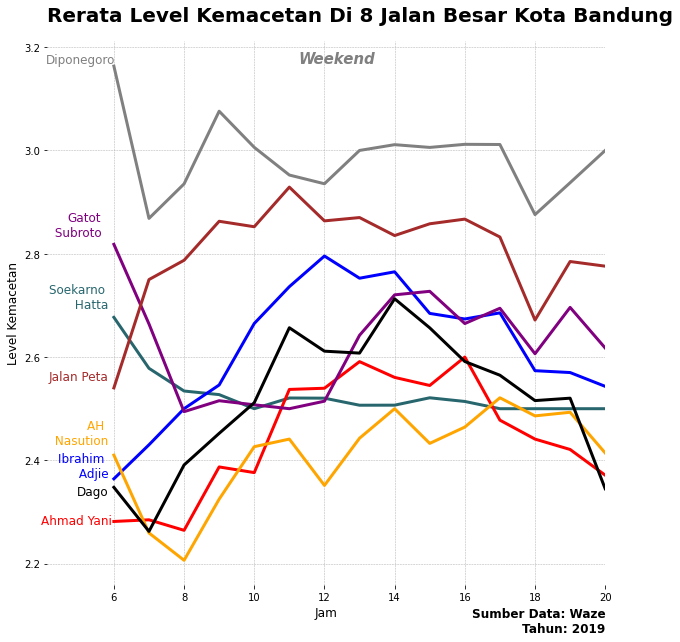

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(soetta['hour'],soetta['rerata'],color='#28666E' ,label = 'Recovery Rate',linewidth=3)
plt.plot(ayani['hour'],ayani['rerata'],color='red' ,label = 'Recovery Rate',linewidth=3)
plt.plot(iadjie['hour'],iadjie['rerata'],color='blue' ,label = 'Recovery Rate',linewidth=3)
plt.plot(ahnasu['hour'],ahnasu['rerata'],color='orange' ,label = 'Recovery Rate',linewidth=3)
plt.plot(gatsu['hour'],gatsu['rerata'],color='purple' ,label = 'Recovery Rate',linewidth=3)
plt.plot(dago['hour'],dago['rerata'],color='black' ,label = 'Recovery Rate',linewidth=3)
plt.plot(peta['hour'],peta['rerata'],color='brown' ,label = 'Recovery Rate',linewidth=3)
plt.plot(dipo['hour'],dipo['rerata'],color='grey' ,label = 'Recovery Rate',linewidth=3)

plt.title('Rerata Level Kemacetan Di 8 Jalan Besar Kota Bandung',fontweight='bold',fontsize=20,pad=20,loc='left')

fig.text(0.58, 0.85, "Weekend",
         fontsize=15, ha='right',color='grey',fontweight='bold',fontstyle='italic')

fig.text(0.22,0.85,"Diponegoro",fontsize=12,color='grey',ha='right')
fig.text(0.21,0.41,"Jalan Peta",fontsize=12,color='brown',ha='right')
fig.text(0.2,0.61,"Gatot\n Subroto",fontsize=12,color='purple',ha='right')
fig.text(0.215,0.21,"Ahmad Yani",fontsize=12,color='red',ha='right')
fig.text(0.21,0.275,"Ibrahim \n Adjie",fontsize=12,color='blue',ha='right')
fig.text(0.21,0.32,"AH \n Nasution",fontsize=12,color='orange',ha='right')
fig.text(0.21,0.25,"Dago",fontsize=12,color='black',ha='right')
fig.text(0.21,0.51,"Soekarno \n Hatta",fontsize=12,color='#28666E',ha='right')


ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlim(4.1,20)
ax.set_xlabel("Jam", fontsize=12,color='black')
ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

fig.text(0.9,0.06,"Sumber Data: Waze\nTahun: 2019",fontsize=12,color='black',ha='right',fontweight='bold')

#ax.axis('off')
#ax.set_xticklabels(['6','8'])

# 2020

In [16]:
test_2020 = df
test_2020['year'] = test_2020.apply(lambda row: row.time[:4],axis=1)
test_2020['month'] = test_2020.apply(lambda row: row.time[5:7],axis=1)
test_2020['day']= test_2020.apply(lambda row: row.time[8:10],axis=1)
test_2020['hour'] = test_2020.apply(lambda row: row.time[11:13],axis=1)
test_2020 = test_2020[test_2020['year']=='2020']
test_2020[['year','month','day']] = test_2020[['year','month','day']].astype(str).astype(int) 
test_2020['day'] = test_2020.apply(lambda row: datetime.date(row.year,row.month,row.day).weekday(),axis=1)
test_2020['day'] = test_2020['day'].replace([0, 1, 2, 3,4], 'Weekday')
test_2020['day'] = test_2020['day'].replace([5,6], 'Weekend')
test_2020

C:\Users\chris\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-16-f2db1799686a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2020['day'] = test_2020.apply(lambda row: datetime.date(row.year,row.month,row.day).weekday(),axis=1)
<ipython-input-16-f2db1799686a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,time,street,level,geometry,avg_speed_kmh,avg_delay,year,month,day,hour
5766,2020-05-12 22:00:00,Bukit Dago Selatan,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.00000,2020,5,Weekday,22
5792,2020-05-11 14:00:00,N3 Jalan Raya Cibiru,3,"{""type"": ""LineString"", ""coordinates"": [[107.72...",6.550000,169.00000,2020,5,Weekday,14
29604,2020-05-11 14:00:00,Peta,4,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",11.060714,75.57143,2020,5,Weekday,14
166330,2020-05-23 01:00:00,Jumbojet Raya,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.00000,2020,5,Weekend,01
166331,2020-05-23 01:00:00,Kebon Kopi,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.00000,2020,5,Weekend,01
...,...,...,...,...,...,...,...,...,...,...
2911996,2020-05-12 21:00:00,Suren,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.00000,2020,5,Weekday,21
2911997,2020-05-12 21:00:00,Terusan Karangtineung,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.00000,2020,5,Weekday,21
2911998,2020-05-12 21:00:00,Teuku Umar,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.00000,2020,5,Weekday,21
2911999,2020-05-12 19:00:00,Laswi,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",10.252500,79.18750,2020,5,Weekday,19


## Weekday

In [17]:
test_day_2020 = test_2020[test_2020['day']=='Weekday']
street_2020 = test_day_2020.groupby(['street'])['level'].agg('sum').to_frame().reset_index().sort_values(by='level',ascending=False)
street_name_2020 = street_2020[:8]['street'].unique()
test_day_2020['count'] = 1
street_hour_2020 = test_day_2020.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
street_hour_2020['rerata'] = street_hour_2020['level']/street_hour['count']
street_hour_nine_2020 = street_hour_2020[street_hour_2020['street'].isin(street_name)]
street_hour_nine_2020['hour'] = street_hour_nine_2020['hour'].astype(str).astype(int)
street_hour_nine_2020 = street_hour_nine_2020[(street_hour_nine_2020['hour']>5) & (street_hour_nine_2020['hour']<21)]

<ipython-input-17-82394e7abb1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_day_2020['count'] = 1
<ipython-input-17-82394e7abb1e>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  street_hour_2020 = test_day_2020.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
<ipython-input-17-82394e7abb1e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_hour_nine_20

In [18]:
street_name_2020

array(['Gatot Subroto', 'Ir Haji Juanda', 'Buah Batu',
       'Jenderal Ahmad Yani', 'Peta', 'Terusan Buah Batu',
       'KH Wahid Hasyim', 'Jenderal Ibrahim Adjie'], dtype=object)

In [19]:
ayani = street_hour_nine_2020[street_hour_nine_2020['street']=='Jenderal Ahmad Yani'].sort_values(by='hour')
iadjie = street_hour_nine_2020[street_hour_nine_2020['street']=='Jenderal Ibrahim Adjie'].sort_values(by='hour')
hashyim = street_hour_nine_2020[street_hour_nine_2020['street']=='KH Wahid Hasyim'].sort_values(by='hour')
gatsu = street_hour_nine_2020[street_hour_nine_2020['street']=='Gatot Subroto'].sort_values(by='hour')
dago = street_hour_nine_2020[street_hour_nine_2020['street']=='Ir Haji Juanda'].sort_values(by='hour')
peta = street_hour_nine_2020[street_hour_nine_2020['street']=='Peta'].sort_values(by='hour')
ter_bubat = street_hour_nine_2020[street_hour_nine_2020['street']=='Terusan Buah Batu'].sort_values(by='hour')
bubat = street_hour_nine_2020[street_hour_nine_2020['street']=='Buah Batu'].sort_values(by='hour')

Text(0.9, 0.06, 'Sumber Data: Waze\nTahun: 2020')

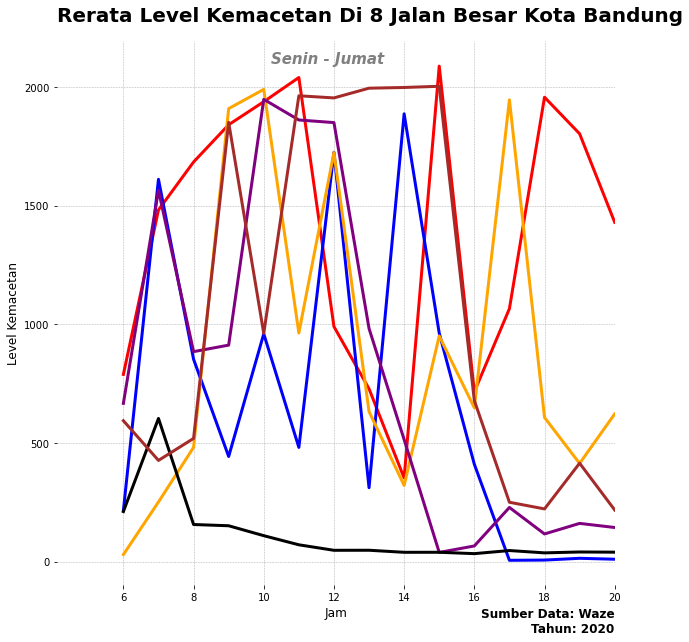

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(hashyim['hour'],hashyim['rerata'],color='#28666E' ,label = 'Recovery Rate',linewidth=3)
plt.plot(ayani['hour'],ayani['rerata'],color='red' ,label = 'Recovery Rate',linewidth=3)
plt.plot(iadjie['hour'],iadjie['rerata'],color='blue' ,label = 'Recovery Rate',linewidth=3)
plt.plot(ter_bubat['hour'],ter_bubat['rerata'],color='orange' ,label = 'Recovery Rate',linewidth=3)
plt.plot(gatsu['hour'],gatsu['rerata'],color='purple' ,label = 'Recovery Rate',linewidth=3)
plt.plot(dago['hour'],dago['rerata'],color='black' ,label = 'Recovery Rate',linewidth=3)
plt.plot(peta['hour'],peta['rerata'],color='brown' ,label = 'Recovery Rate',linewidth=3)
plt.plot(bubat['hour'],bubat['rerata'],color='grey' ,label = 'Recovery Rate',linewidth=3)

plt.title('Rerata Level Kemacetan Di 8 Jalan Besar Kota Bandung',fontweight='bold',fontsize=20,pad=20,loc='left')

fig.text(0.58, 0.85, "Senin - Jumat",
         fontsize=15, ha='right',color='grey',fontweight='bold',fontstyle='italic')

#fig.text(0.22,0.75,"Terusan \nBuah Batu",fontsize=12,color='grey',ha='right')
#fig.text(0.22,0.67,"Jalan Peta",fontsize=12,color='brown',ha='right')
#fig.text(0.2,0.62,"Gatot\n Subroto",fontsize=12,color='purple',ha='right')
#fig.text(0.215,0.57,"Ahmad Yani",fontsize=12,color='red',ha='right')
#fig.text(0.21,0.51,"Ibrahim \n Adjie",fontsize=12,color='blue',ha='right')
#fig.text(0.21,0.462,"AH \n Nasution",fontsize=12,color='orange',ha='right')
#fig.text(0.21,0.44,"Dago",fontsize=12,color='black',ha='right')
#fig.text(0.21,0.39,"Soekarno \n Hatta",fontsize=12,color='#28666E',ha='right')


ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.xlim(4.1,20)
ax.set_xlabel("Jam", fontsize=12,color='black')
ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

fig.text(0.9,0.06,"Sumber Data: Waze\nTahun: 2020",fontsize=12,color='black',ha='right',fontweight='bold')



#ax.axis('off')
#ax.set_xticklabels(['6','8'])

## Weekend

In [21]:
test_day_2020 = test_2020[test_2020['day']=='Weekend']
street_2020 = test_day_2020.groupby(['street'])['level'].agg('sum').to_frame().reset_index().sort_values(by='level',ascending=False)
street_name_2020 = street_2020[:8]['street'].unique()
test_day_2020['count'] = 1
street_hour_2020 = test_day_2020.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
street_hour_2020['rerata'] = street_hour_2020['level']/street_hour['count']
street_hour_nine_2020 = street_hour_2020[street_hour_2020['street'].isin(street_name)]
street_hour_nine_2020['hour'] = street_hour_nine_2020['hour'].astype(str).astype(int)
street_hour_nine_2020 = street_hour_nine_2020[(street_hour_nine_2020['hour']>5) & (street_hour_nine_2020['hour']<21)]

<ipython-input-21-4ab1b421e82b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_day_2020['count'] = 1
<ipython-input-21-4ab1b421e82b>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  street_hour_2020 = test_day_2020.groupby(['street','hour'])['level','count'].agg('sum').reset_index().sort_values(by='count',ascending=False)
<ipython-input-21-4ab1b421e82b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_hour_nine_20

In [22]:
street_name_2020

array(['Ir Haji Juanda', 'Gatot Subroto', 'Peta', 'Buah Batu',
       'Jenderal Ahmad Yani', 'Jenderal Ibrahim Adjie',
       'Jenderal AH Nasution', 'LLRE Martadinata'], dtype=object)

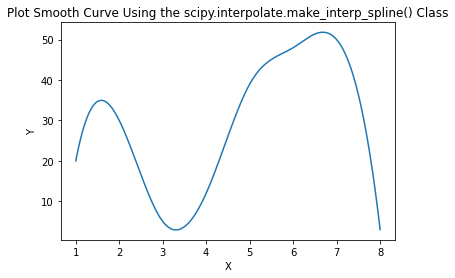

In [3]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([20, 30, 5, 12, 39, 48, 50, 3])
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 10000)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Ters Jakarta - Supratman

In [24]:
m = df['street'].unique()
for i in m:
    print(i)

Padasuka
Pagarsih
Pahlawan
Pajajaran
Palasari
Parakan Saat
Pasteur
Pelajar Pejuang 45
Peta
PHH Mustofa
Prof Dr Ir Sutami
Rancabolang
Jalan Kebonjati
Prof Dr Surya Sumantri
Prof Eyckman
RA Wiranatakusumah
PSM
Purnawarman
Pusdai
R A A Martanegara
Rajawali Timur
Sarijadi
Sederhana
Sekejati
Setraduta Cemara
Siliwangi
Sindang Sirna
Soekarno-Hatta (Jalur Lambat)
Solontongan
Sriwijaya
Sukaasih
WR Supratman
Sukahaji
Sukajadi
Sukamaju
Sukamulya Indah 1
Surapati
Suryakencana
Talaga Bodas
Tamansari
Tata Surya
Abdul Rahman Saleh
Terusan Buah Batu
Terusan Cibaduyut
Terusan Cisaranten Kulon
Terusan Jakarta
Terusan Kiaracondong
Terusan Pasir Koja
Terusan Prof Dr Ir Sutami
Tol Padaleunyi
Trunojoyo
Turangga
Veteran
Westhoff
Akses Tol Pasteur
Arcamanik Endah
Asia Afrika
Astana Anyar
Babakan Ciparay
Babakan Sari
Batu Kencana
Batununggal Indah 2
BKR
Braga
Cigending
Brigjen Katamso
Buah Batu
Budhi
Bukit Jarian
Caringin
Cibaduyut Raya
Cibolerang Barat
Cidurian Selatan
Cidurian Utara
Jalan Banda
Cigondewah R

N5 Pangeran Kornel
N5 Prabu Gajah Agung
Padurenan
Pakularan
Parakan Salak
Pateneun
Pojok
Arah Klender
Sedane
Sindangkerta Raya
Sindang Taman
Sumedang - Cibugel
Tanjungkerta-Buahdua
Tanjung Sari - Haur Gombong
Arah Padalarang/Cileunyi/Jakarta
Tutugan Leles
Cibangbangan - Gamblung
Cigugur Girang
Cihanjuang
Kedung Waringin
Legok-Conggeang
N5 Ir Soekarno
Prabu Geusan Ulun
Pusaka Rakyat
Raya Wado
Sinar Jaya
Sukakarya - Pebayuran
Sumedang Selatan - Situ Raja
Swadaya
Talun
Telaga Asih
Benteng
Cikalongsari - Cilamaya
Cilamaya Kulon Raya
Darawolong
Gerbang Tol Kalihurip 1
Jalan Industri
Jalan Stasiun
Jeprah
Kalimalang (Pasarjati)
Lingkar Selatan Cianjur
Masutakarya
N1 Jalan Raya Cikalong Sari
N1 Lingkar Luar Karawang
Pancawati-Darawolong
Pangkal Perjuangan
Selang Ciwaringin
Raya Cibeber
Rest Area KM 57
Syech Quro
Terusan Mochamad Ali
Bantar
Bojong Jengkol
Bojong Jengkol - Indihyang
Cibeuti
Cipawedal
Dr Mohammad Hatta
Haji Usa
Harvest City Blvd
Jalan Kampung Kali Jeruk
Jalan Kampung Tegal
Jalan 

In [25]:
jkt_sup = df[(df['street']=='WR Supratman') | (df['street']=='Terusan Jakarta') | (df['street']=='Jalan Jakarta') | (df['street']=='Flyover Jalan Jakarta')]

In [26]:
jkt_sup

,time,street,level,geometry,avg_speed_kmh,avg_delay,year,month,day,hour
62,2019-11-13 18:00:00,WR Supratman,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",11.678064,124.677420,2019,11,13,18
73,2019-11-13 18:00:00,WR Supratman,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.000000,2019,11,13,18
92,2019-11-13 18:00:00,Terusan Jakarta,2,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",18.816591,204.136370,2019,11,13,18
93,2019-11-13 18:00:00,Terusan Jakarta,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",13.954231,370.423070,2019,11,13,18
109,2019-11-13 18:00:00,WR Supratman,2,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",16.867500,125.916664,2019,11,13,18
...,...,...,...,...,...,...,...,...,...,...
2916331,2019-11-13 17:00:00,Terusan Jakarta,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",11.629575,266.574460,2019,11,13,17
2916350,2019-11-13 17:00:00,WR Supratman,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",11.297778,162.333330,2019,11,13,17
2916351,2019-11-13 17:00:00,WR Supratman,4,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",5.694117,358.088230,2019,11,13,17
2916352,2019-11-13 17:00:00,WR Supratman,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.000000,2019,11,13,17


In [27]:
jkt_sup['year'].value_counts()

2020    28821
2019    20801
2021     7574
Name: year, dtype: int64

## WR Supratman dan Jalan Jakarta

In [28]:
supratman = jkt_sup[jkt_sup['street']=='WR Supratman']
supratman['time'] = supratman['time'].apply(pd.to_datetime) 
supratman = supratman.sort_values(by='time',ascending=False)

<ipython-input-28-7c1f026b4f6a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supratman['time'] = supratman['time'].apply(pd.to_datetime)


In [29]:
supratman_day = supratman.groupby(['time','year','month','day'])['level'].agg('mean').to_frame().reset_index().sort_values(by='time')
supratman_day

,time,year,month,day,level
0,2019-05-31 16:00:00,2019,05,31,2.0
1,2019-05-31 17:00:00,2019,05,31,2.0
2,2019-05-31 18:00:00,2019,05,31,2.0
3,2019-05-31 19:00:00,2019,05,31,2.5
4,2019-05-31 20:00:00,2019,05,31,2.5
...,...,...,...,...,...
10831,2021-05-02 18:00:00,2021,05,02,2.0
10832,2021-05-02 19:00:00,2021,05,02,2.5
10833,2021-05-02 20:00:00,2021,05,02,3.0
10834,2021-05-02 21:00:00,2021,05,02,3.0


In [30]:
supratman_day.dtypes

time     datetime64[ns]
year             object
month            object
day              object
level           float64
dtype: object

In [31]:
supratman_day['day'] = supratman_day.apply(lambda row: row.year+"-"+row.month+"-"+row.day,axis=1)

In [32]:
supratman_day

,time,year,month,day,level
0,2019-05-31 16:00:00,2019,05,2019-05-31,2.0
1,2019-05-31 17:00:00,2019,05,2019-05-31,2.0
2,2019-05-31 18:00:00,2019,05,2019-05-31,2.0
3,2019-05-31 19:00:00,2019,05,2019-05-31,2.5
4,2019-05-31 20:00:00,2019,05,2019-05-31,2.5
...,...,...,...,...,...
10831,2021-05-02 18:00:00,2021,05,2021-05-02,2.0
10832,2021-05-02 19:00:00,2021,05,2021-05-02,2.5
10833,2021-05-02 20:00:00,2021,05,2021-05-02,3.0
10834,2021-05-02 21:00:00,2021,05,2021-05-02,3.0


In [33]:
supratman_days = supratman_day.groupby(['day'])['level'].agg('mean').to_frame().reset_index().sort_values(by='day')
supratman_days

,day,level
0,2019-05-31,2.437500
1,2019-06-01,2.236842
2,2019-06-02,2.472222
3,2019-06-03,2.300000
4,2019-06-04,2.500000
...,...,...
649,2021-04-28,2.428571
650,2021-04-29,2.187500
651,2021-04-30,2.470588
652,2021-05-01,2.647059


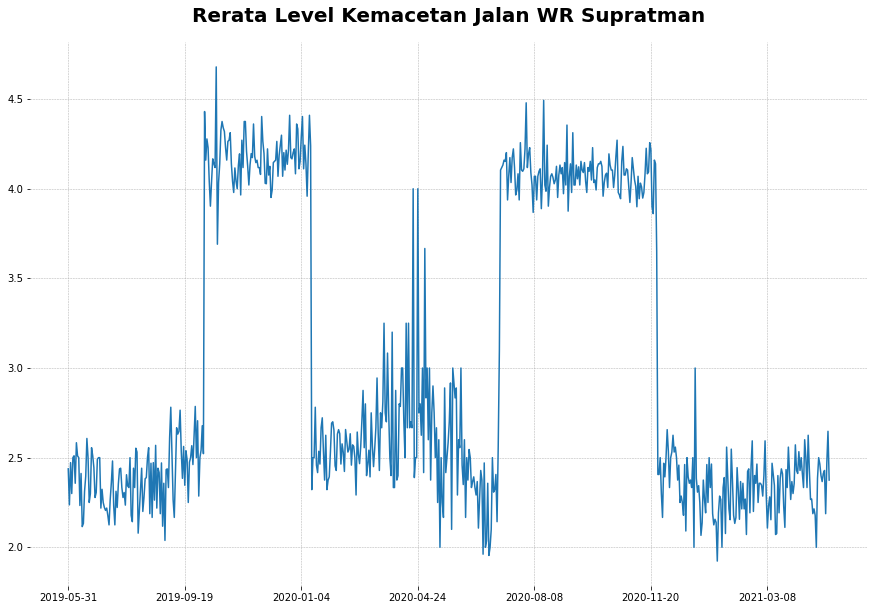

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(supratman_days['day'],supratman_days['level'])
plt.title('Rerata Level Kemacetan Jalan WR Supratman',fontweight='bold',fontsize=20,pad=20,loc='center')
plt.xticks(np.arange(0, len(supratman_days['day'])+1, 100))
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

In [4]:
730*24

17520

In [35]:
supratman_day['count'] = 1

In [36]:
freq_sup = supratman_day.groupby(['day'])['count'].agg('sum').to_frame().reset_index().sort_values(by='day')
freq_sup

,day,count
0,2019-05-31,8
1,2019-06-01,19
2,2019-06-02,18
3,2019-06-03,15
4,2019-06-04,12
...,...,...
649,2021-04-28,14
650,2021-04-29,16
651,2021-04-30,17
652,2021-05-01,17


[Text(0, 0, '31 Mei 2019'),
 Text(100, 0, '19 Sept 2019'),
 Text(200, 0, '4 Jan 2020'),
 Text(300, 0, '24 Apr 2020'),
 Text(400, 0, '8 Aug 2020'),
 Text(500, 0, '20 Nov 2020'),
 Text(600, 0, '8 Mar 2021')]

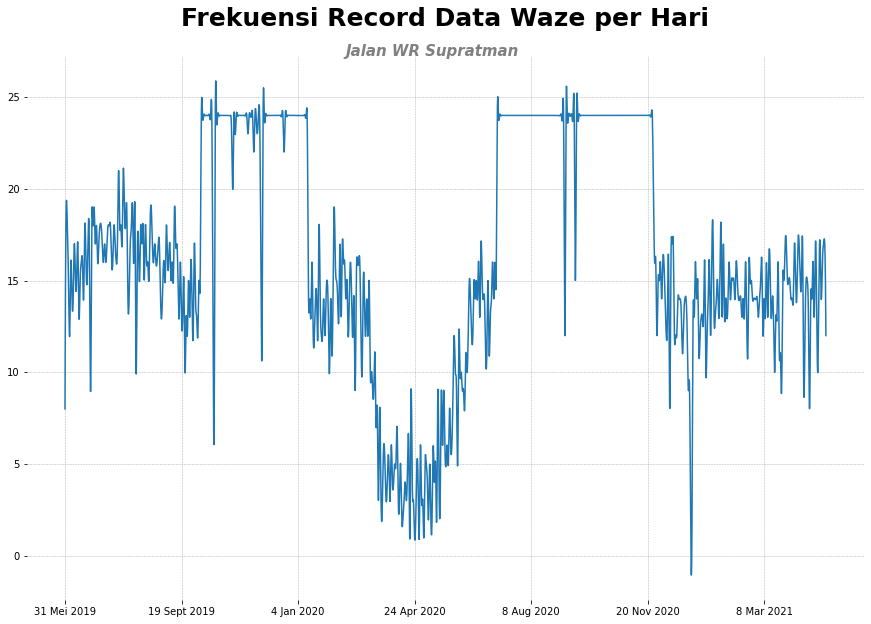

In [37]:
h = list(range(0,654))
sup1 = np.asarray(h)
sup2 = freq_sup['count'].to_numpy()
X_Y_sup = make_interp_spline(sup1, sup2)
 
# Returns evenly spaced numbers
# over a specified interval.
X_sup = np.linspace(sup1.min(), sup1.max(), 5000)
Y_sup = X_Y_sup(X_sup)
 
# Plotting the Graph
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(X_sup, Y_sup)
plt.title('Frekuensi Record Data Waze per Hari',fontweight='bold',fontsize=25,pad=30,loc='center')
plt.xticks(np.arange(0, len(freq_sup['day'])+1, 100))
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
fig.text(0.58, 0.88, "Jalan WR Supratman",
         fontsize=15, ha='right',color='grey',fontweight='bold',fontstyle='italic')
ax.set_xticklabels(['31 Mei 2019', '19 Sept 2019', '4 Jan 2020','24 Apr 2020','8 Aug 2020','20 Nov 2020','8 Mar 2021'])


([<matplotlib.axis.XTick at 0x1ce4fd2b850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

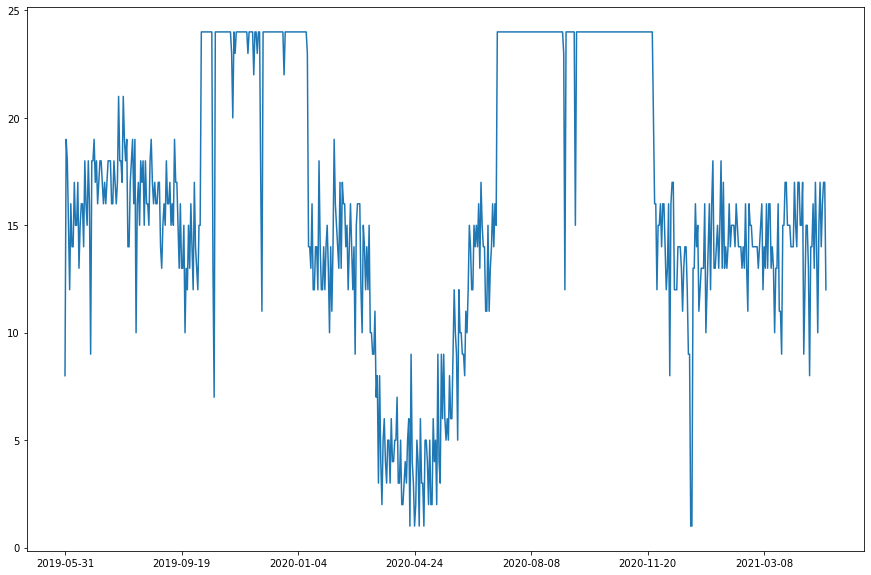

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(freq_sup['day'],freq_sup['count'])
plt.xticks(np.arange(0, len(freq_sup['day'])+1, 100))

## Jl Jakarta

In [39]:
jkt = jkt_sup[jkt_sup['street']=='Jalan Jakarta']
jkt['day'] = jkt.apply(lambda row: row.year+"-"+row.month+"-"+row.day,axis=1)
jkt['count'] = 1

<ipython-input-39-033fb58cd55e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jkt['day'] = jkt.apply(lambda row: row.year+"-"+row.month+"-"+row.day,axis=1)
<ipython-input-39-033fb58cd55e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jkt['count'] = 1


In [40]:
freq_jkt = jkt.groupby(['day'])['count'].agg('sum').to_frame().reset_index().sort_values(by='day')
freq_jkt

,day,count
0,2019-05-31,7
1,2019-06-01,26
2,2019-06-02,18
3,2019-06-03,13
4,2019-06-04,1
...,...,...
601,2021-04-28,11
602,2021-04-29,15
603,2021-04-30,18
604,2021-05-01,11


[Text(0, 0, '31 Mei 2019'),
 Text(100, 0, '19 Sept 2019'),
 Text(200, 0, '4 Jan 2020'),
 Text(300, 0, '24 Apr 2020'),
 Text(400, 0, '8 Aug 2020'),
 Text(500, 0, '20 Nov 2020'),
 Text(600, 0, '8 Mar 2021')]

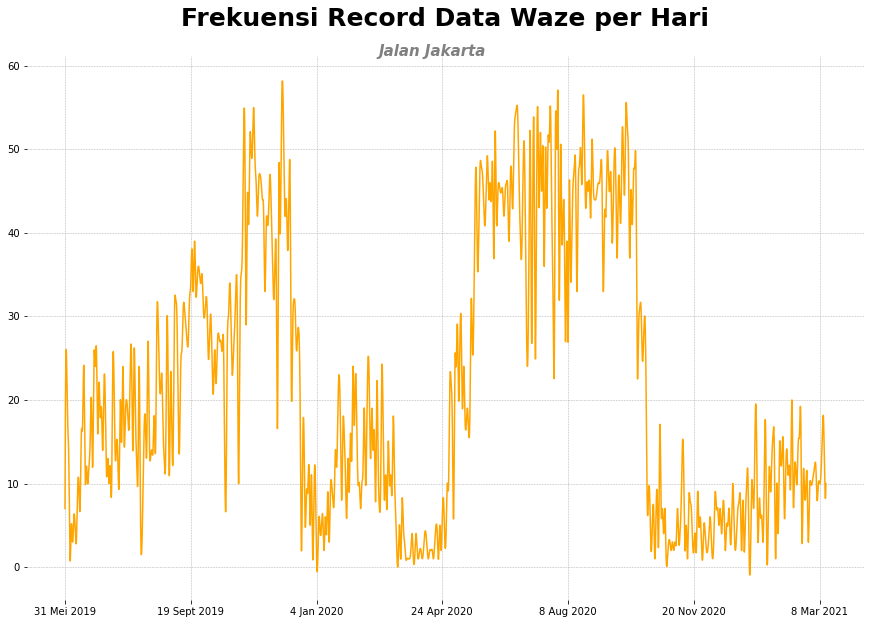

In [41]:
h = list(range(0,606))
sup1 = np.asarray(h)
sup2 = freq_jkt['count'].to_numpy()
X_Y_sup = make_interp_spline(sup1, sup2)
 
# Returns evenly spaced numbers
# over a specified interval.
X_sup = np.linspace(sup1.min(), sup1.max(), 10000)
Y_sup = X_Y_sup(X_sup)
 
# Plotting the Graph
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(X_sup, Y_sup,color='orange')
plt.title('Frekuensi Record Data Waze per Hari',fontweight='bold',fontsize=25,pad=30,loc='center')
plt.xticks(np.arange(0, len(freq_sup['day'])+1, 100))
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
fig.text(0.55, 0.88, "Jalan Jakarta",
         fontsize=15, ha='right',color='grey',fontweight='bold',fontstyle='italic')
ax.set_xticklabels(['31 Mei 2019', '19 Sept 2019', '4 Jan 2020','24 Apr 2020','8 Aug 2020','20 Nov 2020','8 Mar 2021'])


## Rasio Kemacetan: Total Jams/Jumlah record kendaraan

In [42]:
jkt_sup

,time,street,level,geometry,avg_speed_kmh,avg_delay,year,month,day,hour
62,2019-11-13 18:00:00,WR Supratman,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",11.678064,124.677420,2019,11,13,18
73,2019-11-13 18:00:00,WR Supratman,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.000000,2019,11,13,18
92,2019-11-13 18:00:00,Terusan Jakarta,2,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",18.816591,204.136370,2019,11,13,18
93,2019-11-13 18:00:00,Terusan Jakarta,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",13.954231,370.423070,2019,11,13,18
109,2019-11-13 18:00:00,WR Supratman,2,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",16.867500,125.916664,2019,11,13,18
...,...,...,...,...,...,...,...,...,...,...
2916331,2019-11-13 17:00:00,Terusan Jakarta,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",11.629575,266.574460,2019,11,13,17
2916350,2019-11-13 17:00:00,WR Supratman,3,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",11.297778,162.333330,2019,11,13,17
2916351,2019-11-13 17:00:00,WR Supratman,4,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",5.694117,358.088230,2019,11,13,17
2916352,2019-11-13 17:00:00,WR Supratman,5,"{""type"": ""MultiLineString"", ""coordinates"": [[[...",0.000000,-1.000000,2019,11,13,17


In [43]:
jkt_sup['count'] = 1
sup = jkt_sup[jkt_sup['street']=='WR Supratman']
sup = sup[['street','time','level','count']]
sup['day'] = sup.apply(lambda row: row.time[:11],axis=1)
sup_time = sup.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
sup_time['rasio'] = sup_time['level']/sup_time['count']
#moving average 
sup_time['rasio_ma'] = sup_time.iloc[:,4].rolling(window=7).mean()
sup_time

<ipython-input-43-1540e6fafbcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jkt_sup['count'] = 1
<ipython-input-43-1540e6fafbcc>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sup_time = sup.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


,street,day,level,count,rasio,rasio_ma
0,WR Supratman,2019-05-31,58,24,2.416667,NaN
1,WR Supratman,2019-06-01,116,52,2.230769,NaN
2,WR Supratman,2019-06-02,97,41,2.365854,NaN
3,WR Supratman,2019-06-03,93,40,2.325000,NaN
4,WR Supratman,2019-06-04,61,24,2.541667,NaN
...,...,...,...,...,...,...
649,WR Supratman,2021-04-28,70,28,2.500000,2.525045
650,WR Supratman,2021-04-29,75,32,2.343750,2.505581
651,WR Supratman,2021-04-30,82,31,2.645161,2.514413
652,WR Supratman,2021-05-01,99,37,2.675676,2.532120


([<matplotlib.axis.XTick at 0x1ce526153a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

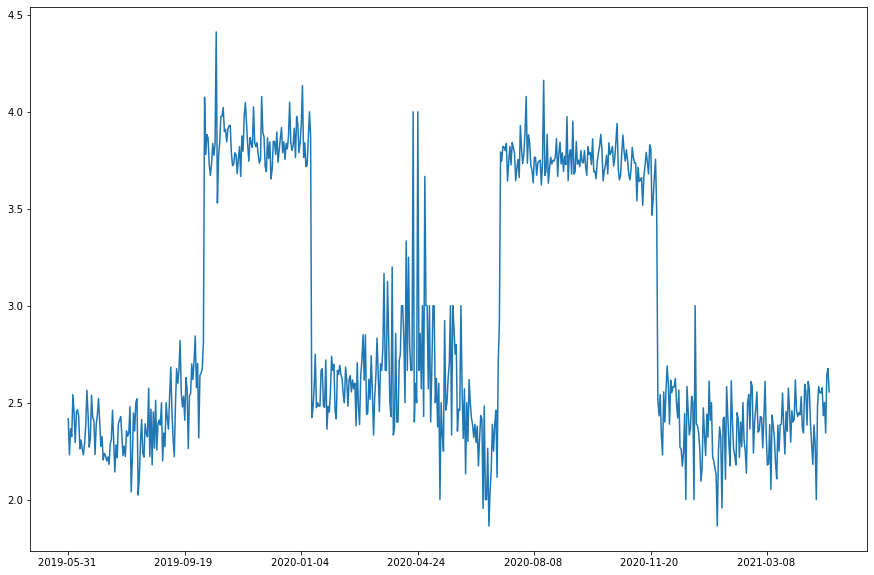

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(sup_time['day'],sup_time['rasio'])
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))

In [45]:
sup_time

,street,day,level,count,rasio,rasio_ma
0,WR Supratman,2019-05-31,58,24,2.416667,NaN
1,WR Supratman,2019-06-01,116,52,2.230769,NaN
2,WR Supratman,2019-06-02,97,41,2.365854,NaN
3,WR Supratman,2019-06-03,93,40,2.325000,NaN
4,WR Supratman,2019-06-04,61,24,2.541667,NaN
...,...,...,...,...,...,...
649,WR Supratman,2021-04-28,70,28,2.500000,2.525045
650,WR Supratman,2021-04-29,75,32,2.343750,2.505581
651,WR Supratman,2021-04-30,82,31,2.645161,2.514413
652,WR Supratman,2021-05-01,99,37,2.675676,2.532120


In [46]:
sup_time[sup_time['day']=="2020-03-15 "]

,street,day,level,count,rasio,rasio_ma
262,WR Supratman,2020-03-15,35,15,2.333333,2.521886


In [47]:
sup_time

,street,day,level,count,rasio,rasio_ma
0,WR Supratman,2019-05-31,58,24,2.416667,NaN
1,WR Supratman,2019-06-01,116,52,2.230769,NaN
2,WR Supratman,2019-06-02,97,41,2.365854,NaN
3,WR Supratman,2019-06-03,93,40,2.325000,NaN
4,WR Supratman,2019-06-04,61,24,2.541667,NaN
...,...,...,...,...,...,...
649,WR Supratman,2021-04-28,70,28,2.500000,2.525045
650,WR Supratman,2021-04-29,75,32,2.343750,2.505581
651,WR Supratman,2021-04-30,82,31,2.645161,2.514413
652,WR Supratman,2021-05-01,99,37,2.675676,2.532120


Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

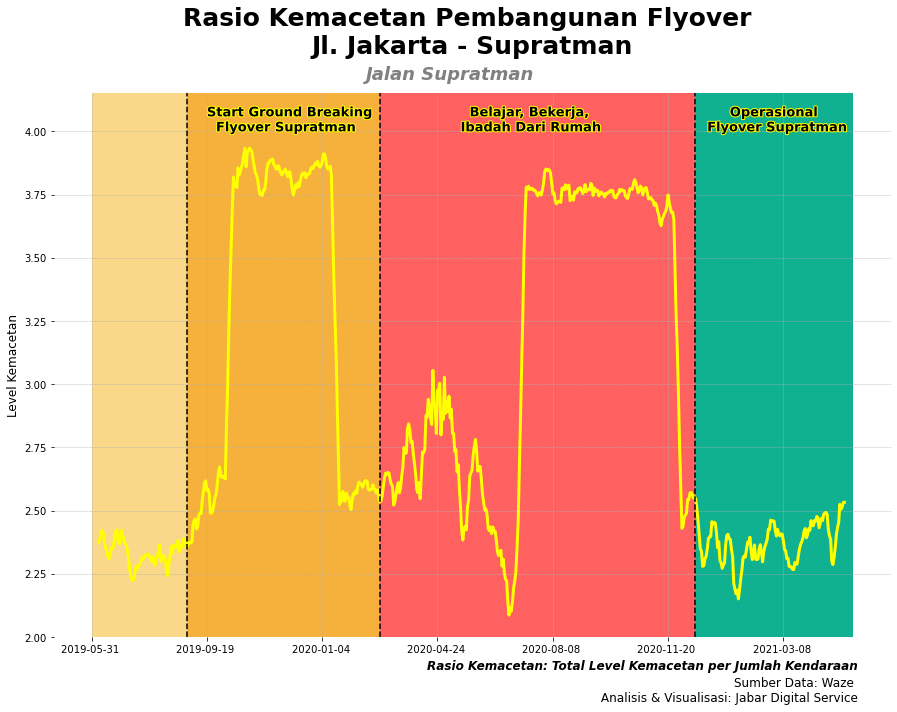

In [48]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(sup_time['day'],sup_time['rasio_ma'],color='yellow',linewidth=3)
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
ax.axvspan(83,524, facecolor='#F5B13B',alpha=1)
plt.axvline(x=523,color='black',linestyle='--')
ax.axvspan(250,524, facecolor='#FF6060',alpha=1)
plt.axvline(x=250,color='black',linestyle='--')
ax.axvspan(524,660, facecolor='#10B190',alpha=1)
plt.axvline(x=83,color='black',linestyle='--')
ax.axvspan(0,83, facecolor='#F9D889',alpha=1)


t1=ax.text(320, 4, "  Belajar, Bekerja, \nIbadah Dari Rumah", fontsize=13,color='black',fontweight='bold')
t2=ax.text(100, 4, "Start Ground Breaking\n  Flyover Supratman", fontsize=13,color='black',fontweight='bold')
t3=ax.text(530, 4, "      Operasional\n Flyover Supratman", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t3.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.57, 0.9, "Jalan Supratman",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Pembangunan Flyover \nJl. Jakarta - Supratman',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.ylim(2,4.15)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')


### Jl. Jakarta

In [49]:
jak = jkt_sup[jkt_sup['street']=='Jalan Jakarta']
jak = jak[['street','time','level','count']]
jak['day'] = jak.apply(lambda row: row.time[:11],axis=1)
jak_time = jak.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
jak_time['rasio'] = jak_time['level']/jak_time['count']
jak_time['rasio_ma'] = jak_time.iloc[:,4].rolling(window=7).mean()
jak_time

<ipython-input-49-9a00cc4ae401>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  jak_time = jak.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


,street,day,level,count,rasio,rasio_ma
0,Jalan Jakarta,2019-05-31,20,7,2.857143,NaN
1,Jalan Jakarta,2019-06-01,71,26,2.730769,NaN
2,Jalan Jakarta,2019-06-02,50,18,2.777778,NaN
3,Jalan Jakarta,2019-06-03,34,13,2.615385,NaN
4,Jalan Jakarta,2019-06-04,2,1,2.000000,NaN
...,...,...,...,...,...,...
601,Jalan Jakarta,2021-04-28,29,11,2.636364,2.437662
602,Jalan Jakarta,2021-04-29,38,15,2.533333,2.409957
603,Jalan Jakarta,2021-04-30,45,18,2.500000,2.421861
604,Jalan Jakarta,2021-05-01,30,11,2.727273,2.478139


In [50]:
jak_time[jak_time['day']=="2020-03-15 "]

,street,day,level,count,rasio,rasio_ma
262,Jalan Jakarta,2020-03-15,30,11,2.727273,2.542177


Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

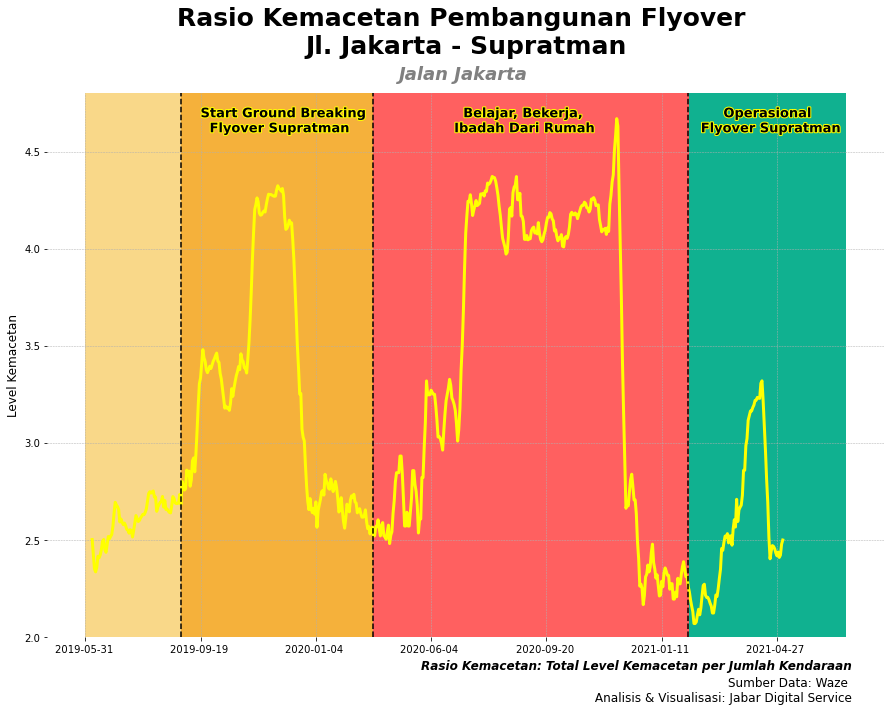

In [51]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(jak_time['day'],jak_time['rasio_ma'],color='yellow',linewidth=3)

ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)


plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
#blok warna per periode
ax.axvspan(83,524, facecolor='#F5B13B',alpha=1)
#bikin garis per periode
plt.axvline(x=523,color='black',linestyle='--')

ax.axvspan(250,524, facecolor='#FF6060',alpha=1)
plt.axvline(x=250,color='black',linestyle='--')
ax.axvspan(524,660, facecolor='#10B190',alpha=1)
plt.axvline(x=83,color='black',linestyle='--')
ax.axvspan(0,83, facecolor='#F9D889',alpha=1)


t1=ax.text(320, 4.6, "  Belajar, Bekerja, \nIbadah Dari Rumah", fontsize=13,color='black',fontweight='bold')
t2=ax.text(100, 4.6, "Start Ground Breaking\n  Flyover Supratman", fontsize=13,color='black',fontweight='bold')
t3=ax.text(530, 4.6, "      Operasional\n Flyover Supratman", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t3.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.57, 0.9, "Jalan Jakarta",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Pembangunan Flyover \nJl. Jakarta - Supratman',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)



plt.ylim(2,4.8)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')


## Jalan Laswi dan Pelajar Pejuang

In [52]:
las_pp = df[(df['street']=='Laswi') | (df['street']=='Pelajar Pejuang 45')]

In [53]:
las_pp['count']=1

<ipython-input-53-2871a403ab95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  las_pp['count']=1


In [54]:
las = las_pp[las_pp['street']=='Laswi']
las = las[['street','time','level','count']]
las['day'] = las.apply(lambda row: row.time[:11],axis=1)
las_time = las.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
las_time['rasio'] = las_time['level']/las_time['count']
las_time['rasio_ma'] = las_time.iloc[:,4].rolling(window=7).mean()
las_time

<ipython-input-54-c32e8be0be48>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  las_time = las.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


,street,day,level,count,rasio,rasio_ma
0,Laswi,2019-05-31,45,14,3.214286,NaN
1,Laswi,2019-06-01,112,35,3.200000,NaN
2,Laswi,2019-06-02,95,29,3.275862,NaN
3,Laswi,2019-06-03,77,24,3.208333,NaN
4,Laswi,2019-06-04,66,20,3.300000,NaN
...,...,...,...,...,...,...
650,Laswi,2021-04-28,59,18,3.277778,3.258416
651,Laswi,2021-04-29,68,21,3.238095,3.242979
652,Laswi,2021-04-30,90,28,3.214286,3.224141
653,Laswi,2021-05-01,76,23,3.304348,3.249762


([<matplotlib.axis.XTick at 0x1ce74377340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

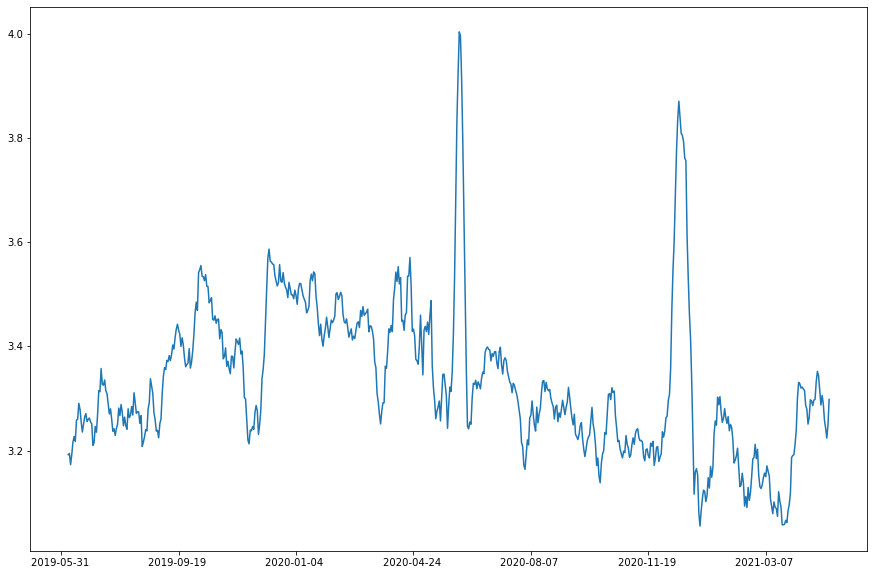

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(las_time['day'],las_time['rasio_ma'])
plt.xticks(np.arange(0, len(las_time['day'])+1, 100))

Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

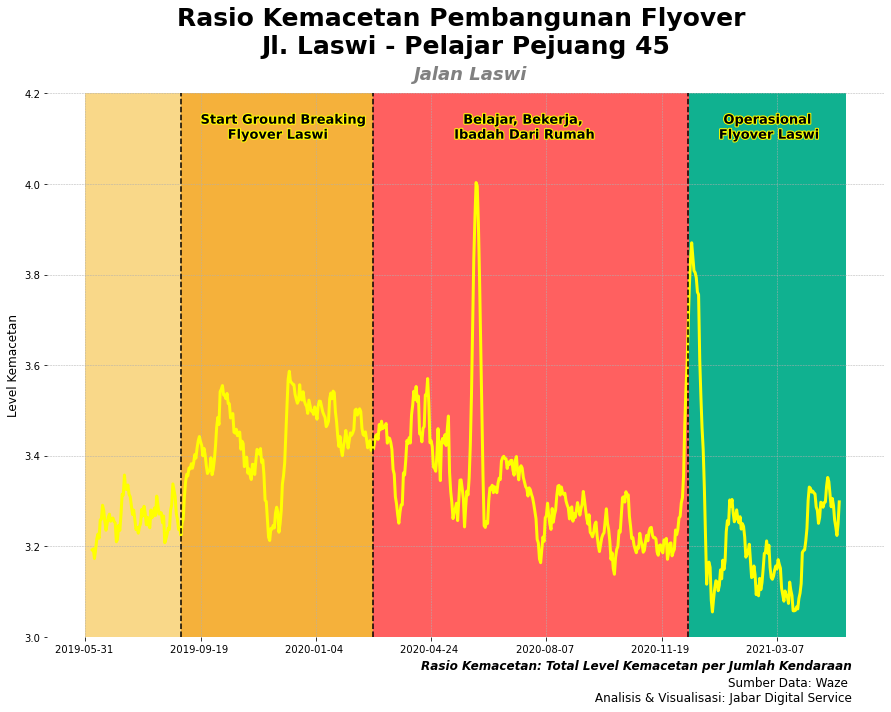

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(las_time['day'],las_time['rasio_ma'],color='yellow',linewidth=3)
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
ax.axvspan(83,524, facecolor='#F5B13B',alpha=1)
plt.axvline(x=523,color='black',linestyle='--')
ax.axvspan(250,524, facecolor='#FF6060',alpha=1)
plt.axvline(x=250,color='black',linestyle='--')
ax.axvspan(524,660, facecolor='#10B190',alpha=1)
plt.axvline(x=83,color='black',linestyle='--')
ax.axvspan(0,83, facecolor='#F9D889',alpha=1)


t1=ax.text(320, 4.1, "  Belajar, Bekerja, \nIbadah Dari Rumah", fontsize=13,color='black',fontweight='bold')
t2=ax.text(100, 4.1, "Start Ground Breaking\n      Flyover Laswi", fontsize=13,color='black',fontweight='bold')
t3=ax.text(530, 4.1, "      Operasional\n     Flyover Laswi", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t3.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.57, 0.9, "Jalan Laswi",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Pembangunan Flyover \nJl. Laswi - Pelajar Pejuang 45',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.ylim(3,4.2)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')


In [57]:
pp = las_pp[las_pp['street']=='Pelajar Pejuang 45']
pp = pp[['street','time','level','count']]
pp['day'] = pp.apply(lambda row: row.time[:11],axis=1)
pp_time = pp.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
pp_time['rasio'] = pp_time['level']/pp_time['count']
pp_time['rasio_ma'] = pp_time.iloc[:,4].rolling(window=7).mean()
pp_time

<ipython-input-57-e041101af18a>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pp_time = pp.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


,street,day,level,count,rasio,rasio_ma
0,Pelajar Pejuang 45,2019-05-31,46,18,2.555556,NaN
1,Pelajar Pejuang 45,2019-06-01,87,34,2.558824,NaN
2,Pelajar Pejuang 45,2019-06-02,87,34,2.558824,NaN
3,Pelajar Pejuang 45,2019-06-03,89,33,2.696970,NaN
4,Pelajar Pejuang 45,2019-06-04,77,31,2.483871,NaN
...,...,...,...,...,...,...
650,Pelajar Pejuang 45,2021-04-28,79,29,2.724138,2.741148
651,Pelajar Pejuang 45,2021-04-29,93,35,2.657143,2.742860
652,Pelajar Pejuang 45,2021-04-30,90,33,2.727273,2.736157
653,Pelajar Pejuang 45,2021-05-01,94,33,2.848485,2.756529


Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

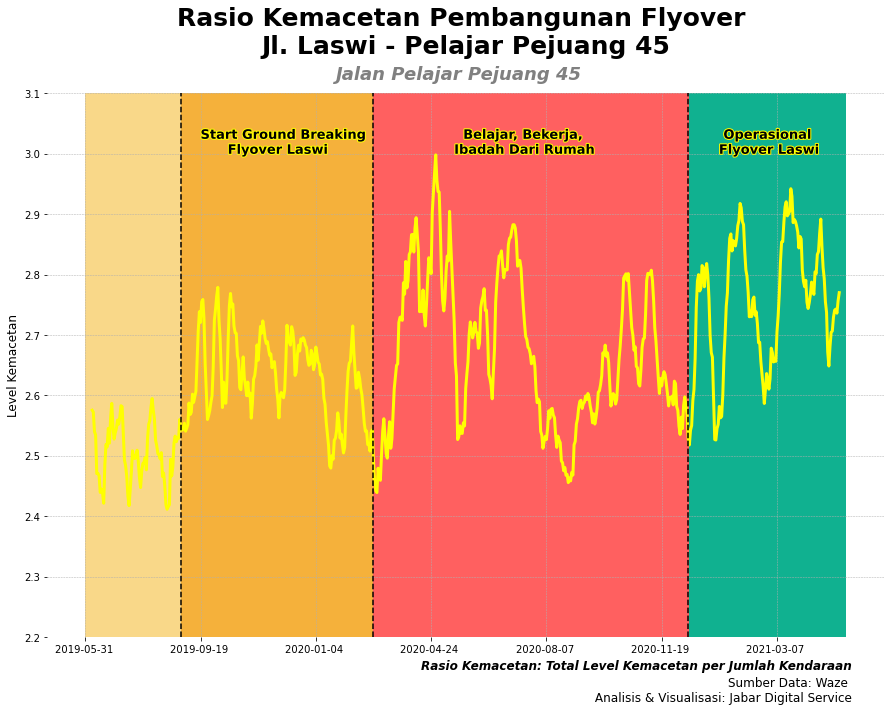

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(pp_time['day'],pp_time['rasio_ma'],color='yellow',linewidth=3)
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
ax.axvspan(83,524, facecolor='#F5B13B',alpha=1)
plt.axvline(x=523,color='black',linestyle='--')
ax.axvspan(250,524, facecolor='#FF6060',alpha=1)
plt.axvline(x=250,color='black',linestyle='--')
ax.axvspan(524,660, facecolor='#10B190',alpha=1)
plt.axvline(x=83,color='black',linestyle='--')
ax.axvspan(0,83, facecolor='#F9D889',alpha=1)


t1=ax.text(320, 3, "  Belajar, Bekerja, \nIbadah Dari Rumah", fontsize=13,color='black',fontweight='bold')
t2=ax.text(100, 3, "Start Ground Breaking\n      Flyover Laswi", fontsize=13,color='black',fontweight='bold')
t3=ax.text(530, 3, "      Operasional\n     Flyover Laswi", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t3.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.62, 0.9, "Jalan Pelajar Pejuang 45",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Pembangunan Flyover \nJl. Laswi - Pelajar Pejuang 45',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.ylim(2.2,3.1)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')


## Cipaganti Cihampelas Sukajadi Setiabudi

In [59]:
#Cutoff: 18 Juli 2019
# Cihampelas
# Sukajadi
# Dr Setiabudi
# RA Wiranatakusumah

In [60]:
df['count'] = 1

In [61]:
cmpelas = df[df['street']=='Cihampelas']
skajadi = df[df['street']=='Sukajadi']
stbudi = df[df['street']=='Dr Setiabudi']
cpaganti = df[df['street']=='RA Wiranatakusumah']

## Cihampelas

In [62]:
cmpelas = cmpelas[['street','time','level','count']]
cmpelas['day'] = cmpelas.apply(lambda row: row.time[:11],axis=1)
cmpelas_time = cmpelas.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
cmpelas_time['rasio'] = cmpelas_time['level']/cmpelas_time['count']
cmpelas_time['rasio_ma'] = cmpelas_time.iloc[:,4].rolling(window=7).mean()
cmpelas_time

<ipython-input-62-9b178654f3f3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cmpelas_time = cmpelas.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


,street,day,level,count,rasio,rasio_ma
0,Cihampelas,2019-05-31,40,17,2.352941,NaN
1,Cihampelas,2019-06-01,83,29,2.862069,NaN
2,Cihampelas,2019-06-02,83,30,2.766667,NaN
3,Cihampelas,2019-06-03,84,32,2.625000,NaN
4,Cihampelas,2019-06-04,89,33,2.696970,NaN
...,...,...,...,...,...,...
649,Cihampelas,2021-04-28,73,37,1.972973,2.157610
650,Cihampelas,2021-04-29,79,38,2.078947,2.132022
651,Cihampelas,2021-04-30,71,33,2.151515,2.143815
652,Cihampelas,2021-05-01,113,45,2.511111,2.188259


In [63]:
cmpelas_date = cmpelas_time[cmpelas_time['day']=='2019-07-18 ']
cmpelas_date

,street,day,level,count,rasio,rasio_ma
37,Cihampelas,2019-07-18,112,43,2.604651,2.539591


([<matplotlib.axis.XTick at 0x1ce5e5d1490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

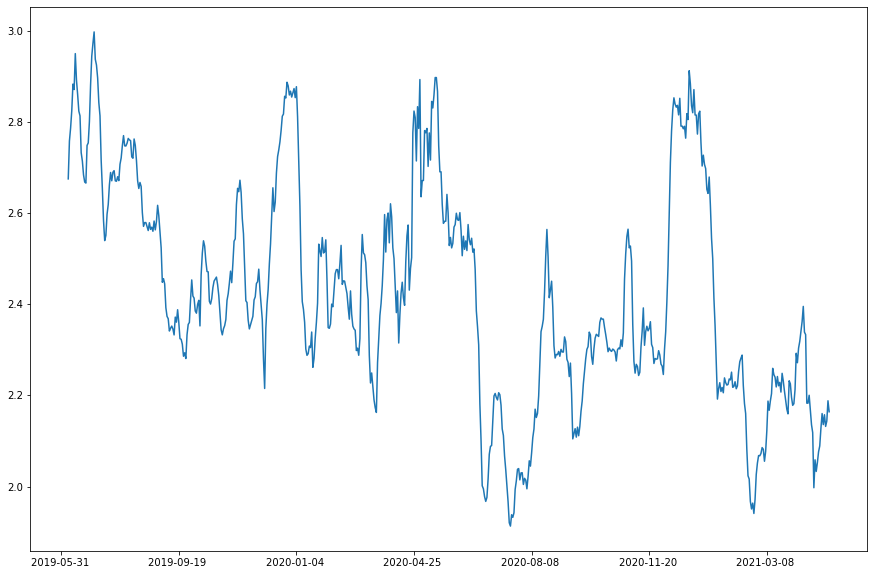

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(cmpelas_time['day'],cmpelas_time['rasio_ma'])
plt.xticks(np.arange(0, len(cmpelas_time['day'])+1, 100))

Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

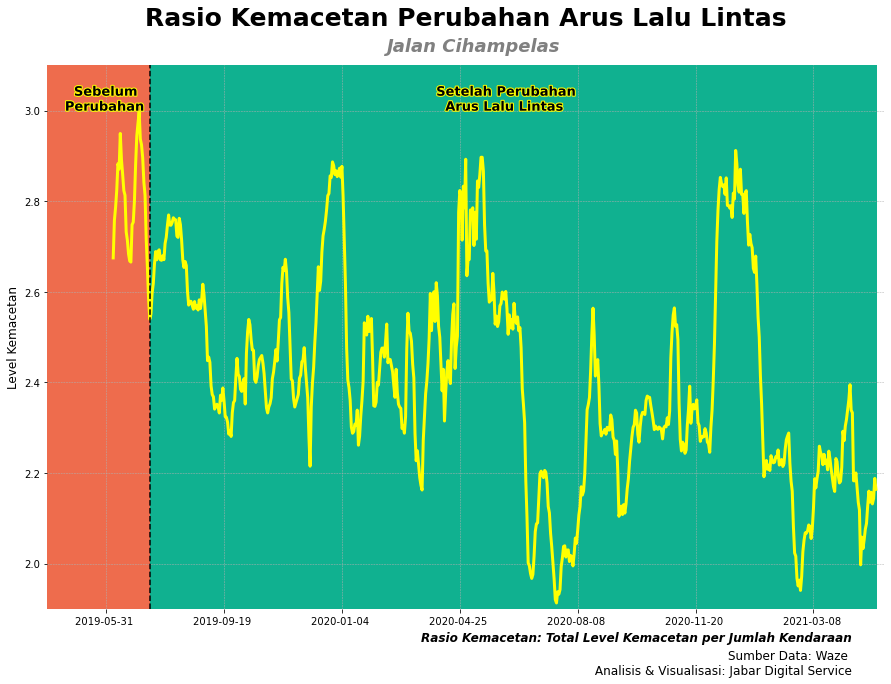

In [65]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(cmpelas_time['day'],cmpelas_time['rasio_ma'],color='yellow',linewidth=3)
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
ax.axvspan(37,654, facecolor='#10B190',alpha=1)
ax.axvspan(-50,37, facecolor='#EE6C4D',alpha=1)
plt.axvline(x=37,color='black',linestyle='--')


t1=ax.text(280, 3, "Setelah Perubahan \n  Arus Lalu Lintas", fontsize=13,color='black',fontweight='bold')
t2=ax.text(-35, 3, "  Sebelum\nPerubahan", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.6, 0.9, "Jalan Cihampelas",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Perubahan Arus Lalu Lintas',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.ylim(1.9,3.1)
plt.xlim(-50,660)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')


## Sukajadi

In [66]:
skajadi = skajadi[['street','time','level','count']]
skajadi['day'] = skajadi.apply(lambda row: row.time[:11],axis=1)
skajadi_time = skajadi.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
skajadi_time['rasio'] = skajadi_time['level']/skajadi_time['count']
skajadi_time['rasio_ma'] = skajadi_time.iloc[:,4].rolling(window=7).mean()

<ipython-input-66-75e96f94cf3a>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  skajadi_time = skajadi.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


In [67]:
skajadi_date = skajadi_time[skajadi_time['day']=='2019-07-18 ']
skajadi_date

,street,day,level,count,rasio,rasio_ma
37,Sukajadi,2019-07-18,71,33,2.151515,1.962834


([<matplotlib.axis.XTick at 0x1ce508b3160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

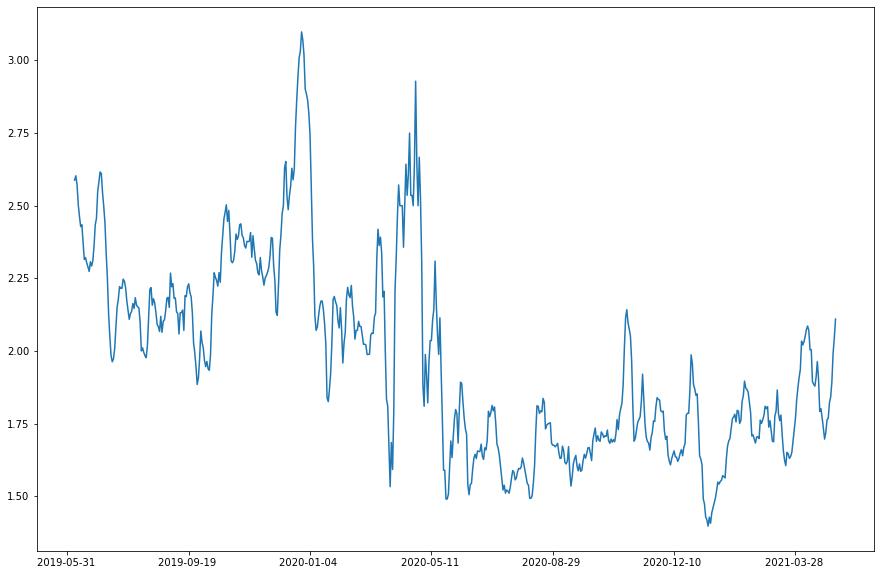

In [68]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(skajadi_time['day'],skajadi_time['rasio_ma'])
plt.xticks(np.arange(0, len(skajadi_time['day'])+1, 100))

Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

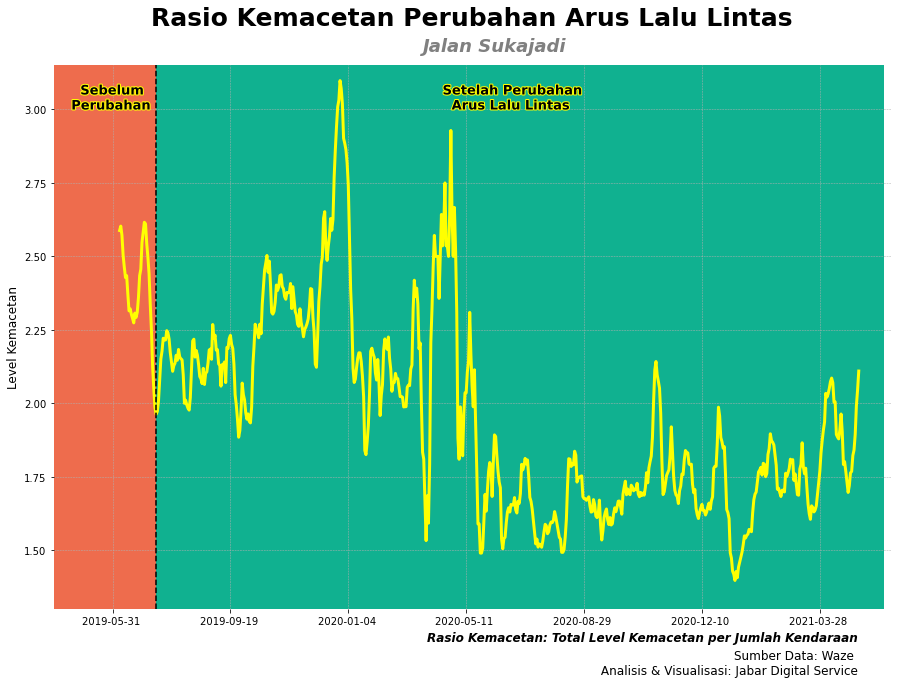

In [69]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(skajadi_time['day'],skajadi_time['rasio_ma'],color='yellow',linewidth=3)
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
ax.axvspan(37,654, facecolor='#10B190',alpha=1)
ax.axvspan(-50,37, facecolor='#EE6C4D',alpha=1)
plt.axvline(x=37,color='black',linestyle='--')


t1=ax.text(280, 3, "Setelah Perubahan \n  Arus Lalu Lintas", fontsize=13,color='black',fontweight='bold')
t2=ax.text(-35, 3, "  Sebelum\nPerubahan", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.6, 0.9, "Jalan Sukajadi",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Perubahan Arus Lalu Lintas',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.ylim(1.3,3.15)
plt.xlim(-50,660)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')


## Setiabudi

In [70]:
stbudi = stbudi[['street','time','level','count']]
stbudi['day'] = stbudi.apply(lambda row: row.time[:11],axis=1)
stbudi_time = stbudi.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
stbudi_time['rasio'] = stbudi_time['level']/stbudi_time['count']
stbudi_time['rasio_ma'] = stbudi_time.iloc[:,4].rolling(window=7).mean()

<ipython-input-70-215a7707931d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stbudi_time = stbudi.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


In [71]:
stbudi_date = stbudi_time[stbudi_time['day']=='2019-07-18 ']
stbudi_date

,street,day,level,count,rasio,rasio_ma
37,Dr Setiabudi,2019-07-18,84,44,1.909091,2.043342


([<matplotlib.axis.XTick at 0x1ce52a4ddf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

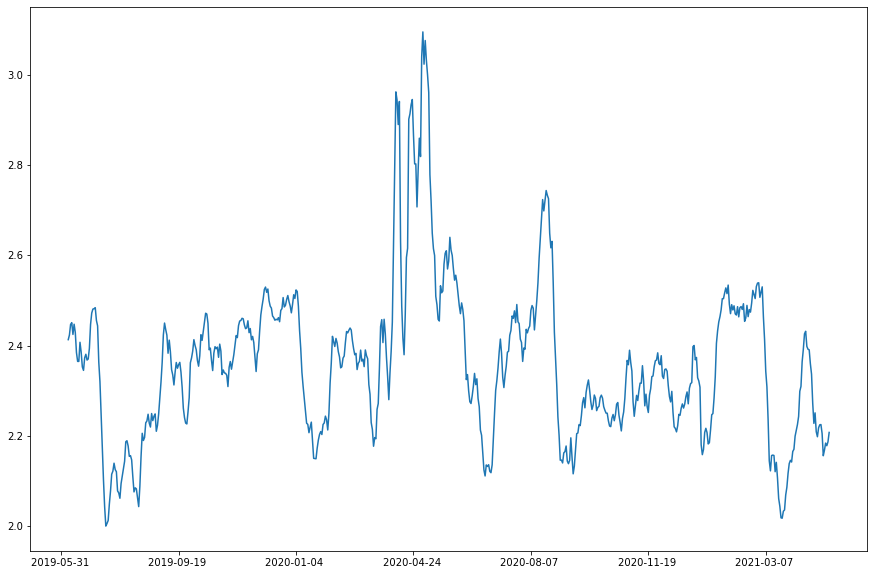

In [72]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(stbudi_time['day'],stbudi_time['rasio_ma'])
plt.xticks(np.arange(0, len(stbudi_time['day'])+1, 100))

Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

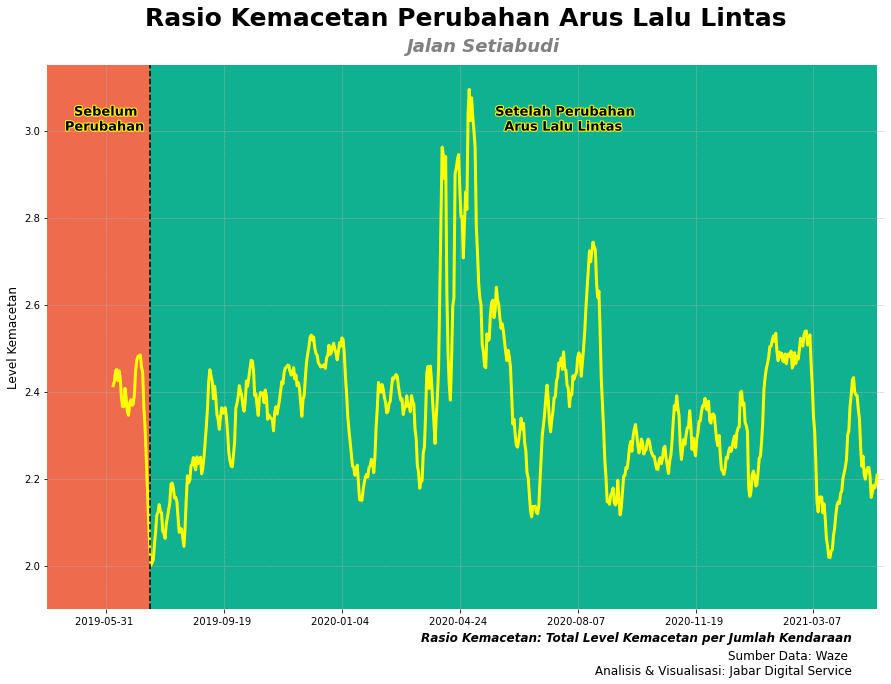

In [73]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(stbudi_time['day'],stbudi_time['rasio_ma'],color='yellow',linewidth=3)
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
ax.axvspan(37,654, facecolor='#10B190',alpha=1)
ax.axvspan(-50,37, facecolor='#EE6C4D',alpha=1)
plt.axvline(x=37,color='black',linestyle='--')


t1=ax.text(330, 3, "Setelah Perubahan \n  Arus Lalu Lintas", fontsize=13,color='black',fontweight='bold')
t2=ax.text(-35, 3, "  Sebelum\nPerubahan", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.6, 0.9, "Jalan Setiabudi",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Perubahan Arus Lalu Lintas',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.ylim(1.9,3.15)
plt.xlim(-50,660)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')


## Cipaganti

In [74]:
cpaganti = cpaganti[['street','time','level','count']]
cpaganti['day'] = cpaganti.apply(lambda row: row.time[:11],axis=1)
cpaganti_time = cpaganti.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')
cpaganti_time['rasio'] = cpaganti_time['level']/cpaganti_time['count']
cpaganti_time['rasio_ma'] = cpaganti_time.iloc[:,4].rolling(window=7).mean()

<ipython-input-74-8995f8e486f1>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cpaganti_time = cpaganti.groupby(['street','day'])['level','count'].agg('sum').reset_index().sort_values(by='day')


In [75]:
cpaganti_date = cpaganti_time[stbudi_time['day']=='2019-07-18 ']
cpaganti_date

,street,day,level,count,rasio,rasio_ma
37,RA Wiranatakusumah,2019-07-18,145,48,3.020833,3.538123


([<matplotlib.axis.XTick at 0x1ce3fe9a700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

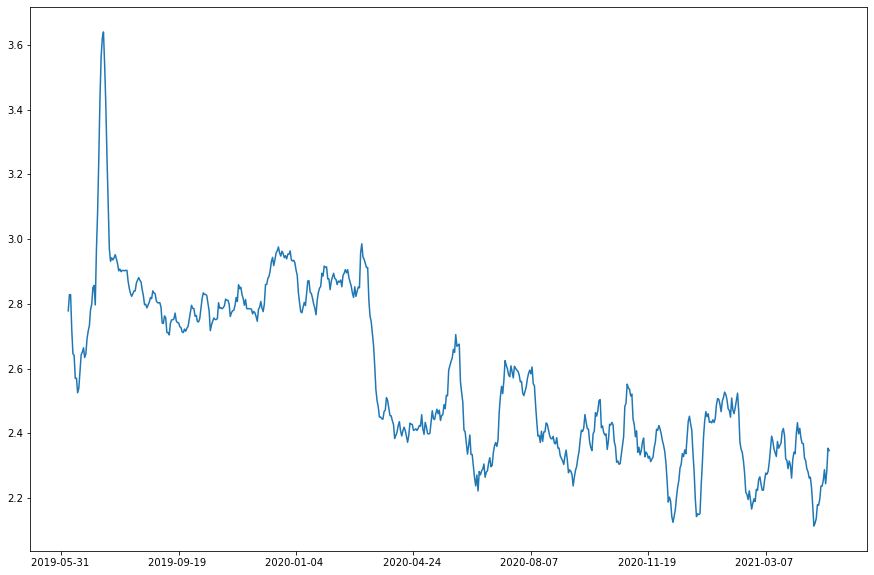

In [76]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(cpaganti_time['day'],cpaganti_time['rasio_ma'])
plt.xticks(np.arange(0, len(cpaganti_time['day'])+1, 100))

Text(0.87, 0.035, 'Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service')

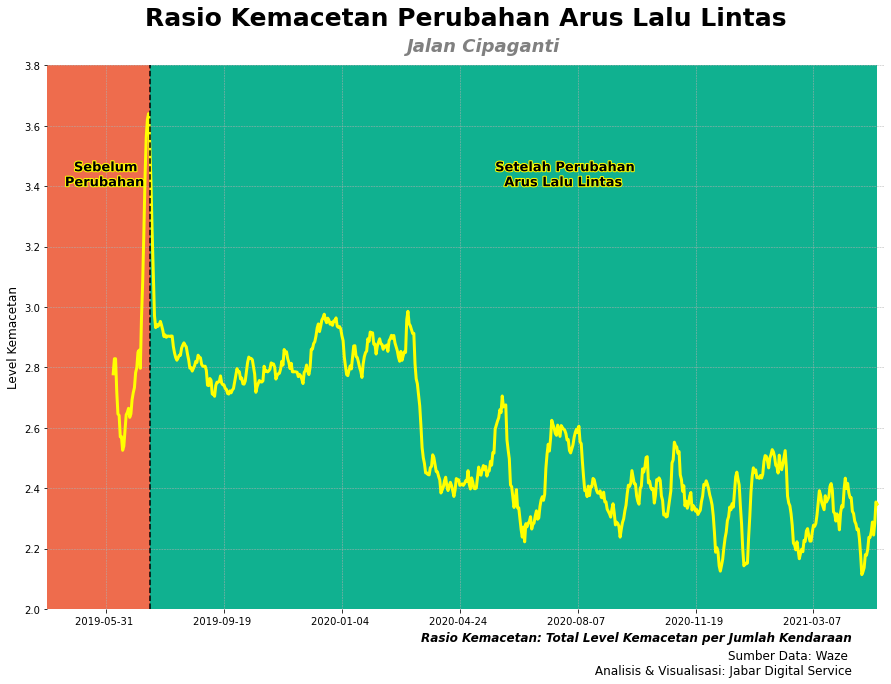

In [77]:
fig, ax = plt.subplots(figsize=(15,10))
plt.plot(cpaganti_time['day'],cpaganti_time['rasio_ma'],color='yellow',linewidth=3)
ax.xaxis.grid(linestyle='--',linewidth=0.5)
ax.yaxis.grid(linestyle='--',linewidth=0.5)
plt.xticks(np.arange(0, len(sup_time['day'])+1, 100))
ax.axvspan(37,654, facecolor='#10B190',alpha=1)
ax.axvspan(-50,37, facecolor='#EE6C4D',alpha=1)
plt.axvline(x=37,color='black',linestyle='--')


t1=ax.text(330, 3.4, "Setelah Perubahan \n  Arus Lalu Lintas", fontsize=13,color='black',fontweight='bold')
t2=ax.text(-35, 3.4, "  Sebelum\nPerubahan", fontsize=13,color='black',fontweight='bold')

t1.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])
t2.set_path_effects([path_effects.withStroke(linewidth=2,foreground='yellow')])

fig.text(0.6, 0.9, "Jalan Cipaganti",
         fontsize=18, ha='right',color='grey',fontweight='bold',fontstyle='italic')
plt.title('Rasio Kemacetan Perubahan Arus Lalu Lintas',fontweight='bold',fontsize=25,pad=40,loc='center')

ax.set_ylabel("Level Kemacetan", fontsize=12,color='black')

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.ylim(2,3.8)
plt.xlim(-50,660)

fig.text(0.87, 0.08, "Rasio Kemacetan: Total Level Kemacetan per Jumlah Kendaraan",
         fontsize=12, ha='right',fontstyle='italic',fontweight='bold')
fig.text(0.87, 0.035, "Sumber Data: Waze \n Analisis & Visualisasi: Jabar Digital Service",
         fontsize=12, ha='right')
